In [1]:
# Data Analysis for Photoresistor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# For 20k Ohms
d20k_d = pd.read_csv("20kohms_with_blink_dark.csv", skiprows = 10)
d20k_l = pd.read_csv("20kohms_with_blink_light.csv", skiprows = 10)

# For 12k Ohms
d12k_d = pd.read_csv("12kohms_with_blink_dark.csv", skiprows = 10)
d12k_l = pd.read_csv("12kohms_with_blink_light.csv", skiprows = 10)

# For 470 Ohms
d470_d = pd.read_csv("470ohms_with_blink_dark.csv", skiprows = 10)
d470_l = pd.read_csv("470ohms_with_blink_light.csv", skiprows = 10)

In [3]:
# Axis names/ Column names
x = d20k_d.columns[0]
y = d20k_d.columns[1]

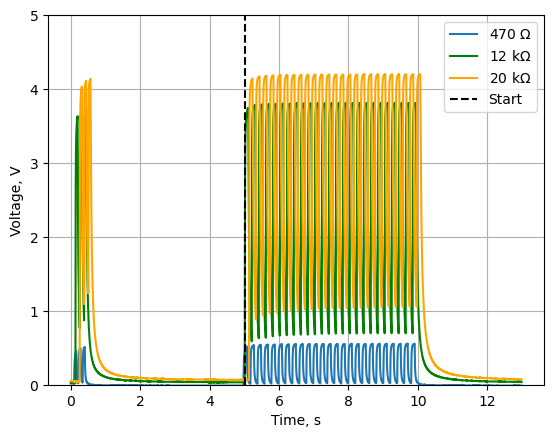

In [4]:
# For total darkness

num = 5.85

# 470 Ohms
x1 = d470_d[x][d470_d[x] < - 145].to_numpy()
x1_indices = np.argwhere(x1 >= np.min(x1) + num)
x1 = x1[x1_indices]
x1 = x1 - np.min(x1)
y1 = d470_d[y].to_numpy()[x1_indices]
plt.plot(x1, y1, label = "470 $\Omega$")

# 12k Ohms
x2 = d12k_d[x][d12k_d[x] < - 145].to_numpy()
x2_indices = np.argwhere(x2 >= np.min(x2) + num)
x2 = x2[x2_indices]
x2 = x2 - np.min(x2)
y2 = d12k_d[y].to_numpy()[x2_indices]
plt.plot(x2, y2, label = "12 k$\Omega$", color = "green")

# 20k Ohms
x3 = d20k_d[x][d20k_d[x] < - 145].to_numpy()
x3_indices = np.argwhere(x3 >= np.min(x3) + num)
x3 = x3[x3_indices]
x3 = x3 - np.min(x3)
y3 = d20k_d[y].to_numpy()[x3_indices]
plt.plot(x3, y3, label = "20 k$\Omega$", color = "orange")

plt.vlines(5.03, 0, 5, colors = "black", linestyles = "--", label = "Start")
plt.ylim(0, 5)


plt.xlabel("Time, s")
plt.ylabel("Voltage, V")
plt.legend()
plt.grid()
plt.savefig("data1.jpg")
plt.show()

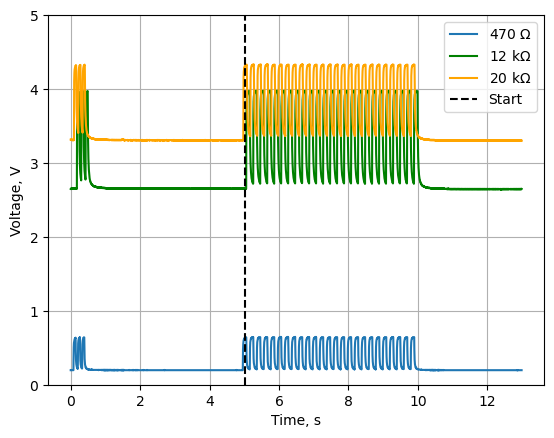

In [5]:
# For room light
# 470 Ohms
x1 = d470_l[x][d470_l[x] < - 145].to_numpy()
x1_indices = np.argwhere(x1 >= np.min(x1) + num)
x1 = x1[x1_indices]
x1 = x1 - np.min(x1)
y1 = d470_l[y].to_numpy()[x1_indices]
plt.plot(x1, y1, label = "470 $\Omega$")

# 12k Ohms
x2 = d12k_l[x][d12k_l[x] < - 145].to_numpy()
x2_indices = np.argwhere(x2 >= np.min(x2) + num)
x2 = x2[x2_indices]
x2 = x2 - np.min(x2)
y2 = d12k_l[y].to_numpy()[x2_indices]
plt.plot(x2, y2, label = "12 k$\Omega$", color = "green")

# 20k Ohms
x3 = d20k_l[x][d20k_l[x] < - 145].to_numpy()
x3_indices = np.argwhere(x3 >= np.min(x3) + num)
x3 = x3[x3_indices]
x3 = x3 - np.min(x3)
y3 = d20k_l[y].to_numpy()[x3_indices]
plt.plot(x3, y3, label = "20 k$\Omega$", color = "orange")

plt.vlines(5.03, 0, 5, colors = "black", linestyles = "--", label = "Start")
plt.ylim(0, 5)


plt.xlabel("Time, s")
plt.ylabel("Voltage, V")
plt.legend()
plt.grid()
plt.savefig("data2.jpg")
plt.show()

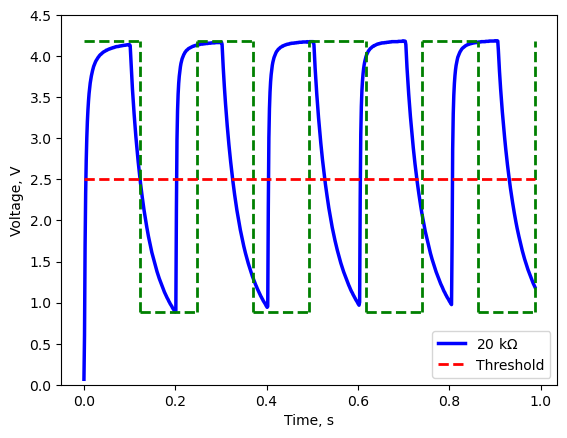

In [6]:
# 20k Ohms
x3 = d20k_d[x][d20k_d[x] < - 145].to_numpy()
x3_indices = np.argwhere(x3 >= np.min(x3) + num)
x3 = x3[x3_indices]
x3 = x3 - np.min(x3)
y3 = d20k_d[y].to_numpy()[x3_indices]
# u = 4100
# v = 5500
u = 4109
v = 4900
d1 = x3[u : v]
d1 = d1 - np.min(d1)
d2 = y3[u : v]
plt.plot(d1, d2, label = "20 k$\Omega$", color = "blue", linewidth = 2.5)


a = np.min(d1)
b = np.max(d1)
period = 1 / 10
N = int((b - a) / period)
time_val = np.linspace(a, b, N)
step_file = [1]
value = 1
for index in range(1, len(time_val)):
    if value == 1:
        plt.plot([time_val[index - 1], time_val[index]], [value * np.max(d2), value * np.max(d2)], "g", linewidth = 2, linestyle = "--")
        plt.vlines(time_val[index], np.min(d2[100 :]), np.max(d2), colors = "g", linewidth = 2, linestyles = "--")
    else:
        plt.plot([time_val[index - 1], time_val[index]], [value + np.min(d2[100 :]), value + np.min(d2[100 :])], "g", linewidth = 2, linestyle = "--")
        plt.vlines(time_val[index], np.min(d2[100 :]), np.max(d2), colors = "g", linewidth = 2, linestyles = "--")
#     plt.hlines
#     step_file.append(value)
    value = (value + 1) % 2


plt.hlines(2.5, np.min(d1), np.max(d1), colors = "r", linestyles = "--", linewidth = 2, label = "Threshold")
plt.xlabel("Time, s")
plt.ylabel("Voltage, V")


plt.legend(loc = "lower right")
plt.ylim(0, 4.5)
plt.savefig("data3")
plt.show()

In [71]:
np.max(y3[u : v])

4.188170869286343

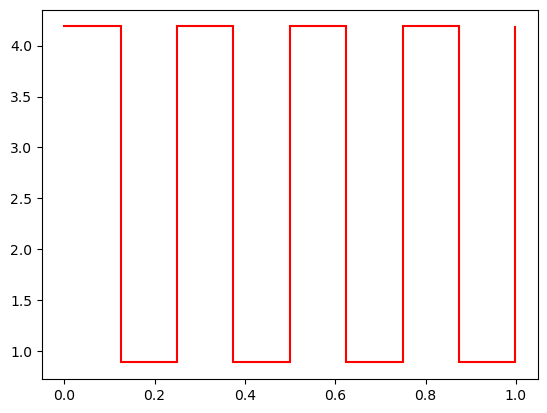

In [101]:
a = np.min(d1)
b = np.max(d1)
period = 1 / 10
N = int((b - a) / period)
time_val = np.linspace(a, b, N)
step_file = [1]
value = 1
for index in range(1, len(time_val)):
    if value == 1:
        plt.plot([time_val[index - 1], time_val[index]], [value * np.max(d2), value * np.max(d2)], "r")
        plt.vlines(time_val[index], np.min(d2[100 :]), np.max(d2), colors = "r")
    else:
        plt.plot([time_val[index - 1], time_val[index]], [value + np.min(d2[100 :]), value + np.min(d2[100 :])], "r")
        plt.vlines(time_val[index], np.min(d2[100 :]), np.max(d2), colors = "r")
#     plt.hlines
#     step_file.append(value)
    value = (value + 1) % 2
    
# plt.ylim(0, 4.5)
# step_file = np.array(step_file)

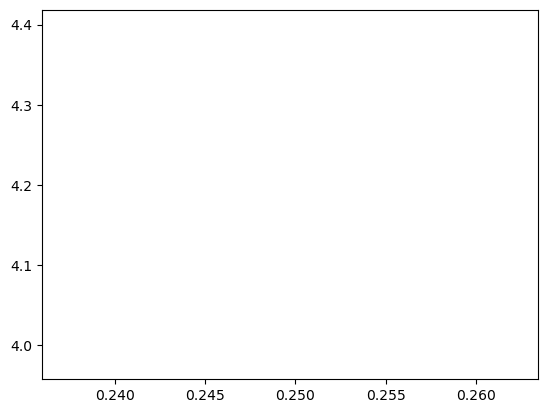

In [96]:
plt.vlines(time_val[2], value * np.max(d2), value * np.max(d2), colors = "r")

In [97]:
value * np.max(d2)

4.188170869286343

In [98]:
value * np.max(d2)

4.188170869286343

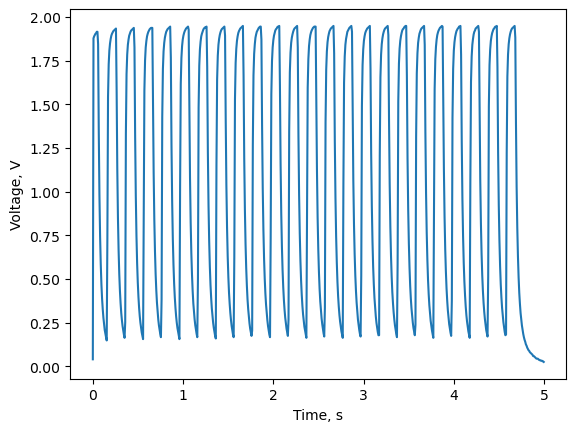

In [138]:
# For Switch
# For 12k Ohms
dat = pd.read_csv("for_switch_response_12kohms.csv", skiprows = 10)
xdat = dat[x].to_numpy()
x_indices = np.argwhere(xdat < - 955)
xdat = xdat[x_indices]
xdat = xdat - np.min(xdat)
ydat = dat[y].to_numpy()[x_indices]

plt.plot(xdat, ydat)
plt.xlabel("Time, s")
plt.ylabel("Voltage, V")
plt.show()

In [132]:
dat

,Time (s),Channel 1 (V),Channel 2 (V)
0,-960.002344,0.040106,-0.000636
1,-959.995020,1.877479,-0.000972
2,-959.987695,1.888660,-0.000636
3,-959.980371,1.896113,-0.000636
4,-959.973047,1.903567,-0.000972
...,...,...,...
3651,-933.261544,-0.012071,-0.000972
3652,-933.254219,-0.012071,-0.000299
3653,-933.246895,-0.012071,-0.000636
3654,-933.239571,-0.012071,-0.000636
